# Car Insurance Modeling


### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load data as dataframe
df = pd.read_csv("Car_insurance_clean+EDA.csv",index_col=0)

In [3]:
df.head()

,AGE,DRIVING_EXPERIENCE,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,GENDER,VEHICLE_YEAR(before 2015),VEHICLE_TYPE(sports car)
0,3,0,0.629027,1.0,0.0,12.0,0,0,0,0.0,0,0,0
1,0,0,0.357757,0.0,0.0,16.0,0,0,0,1.0,1,1,0
2,0,0,0.493146,1.0,0.0,11.0,0,0,0,0.0,0,1,0
3,0,0,0.206013,1.0,0.0,11.0,0,0,0,0.0,1,1,0
4,1,1,0.388366,1.0,0.0,12.0,2,0,1,1.0,1,1,0


In [4]:
df.columns

Index(['AGE', 'DRIVING_EXPERIENCE', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP',
       'MARRIED', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS', 'OUTCOME', 'GENDER', 'VEHICLE_YEAR(before 2015)',
       'VEHICLE_TYPE(sports car)'],
      dtype='object')

## Split the Data

In [5]:
#Take the 6 best Feauters
from sklearn.model_selection import train_test_split
X, y = df.drop(['OUTCOME','CREDIT_SCORE','MARRIED','ANNUAL_MILEAGE','GENDER','VEHICLE_YEAR(before 2015)', 'VEHICLE_TYPE(sports car)'],axis=1), df['OUTCOME']


In [6]:
X.head()

,AGE,DRIVING_EXPERIENCE,VEHICLE_OWNERSHIP,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
0,3,0,1.0,0,0,0
1,0,0,0.0,0,0,0
2,0,0,1.0,0,0,0
3,0,0,1.0,0,0,0
4,1,1,1.0,2,0,1


In [7]:
# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Split data into 80% train and 20% validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.2, random_state=42)

<AxesSubplot:>

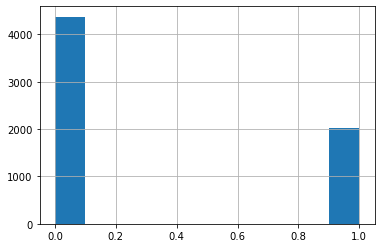

In [9]:
y_train.hist()

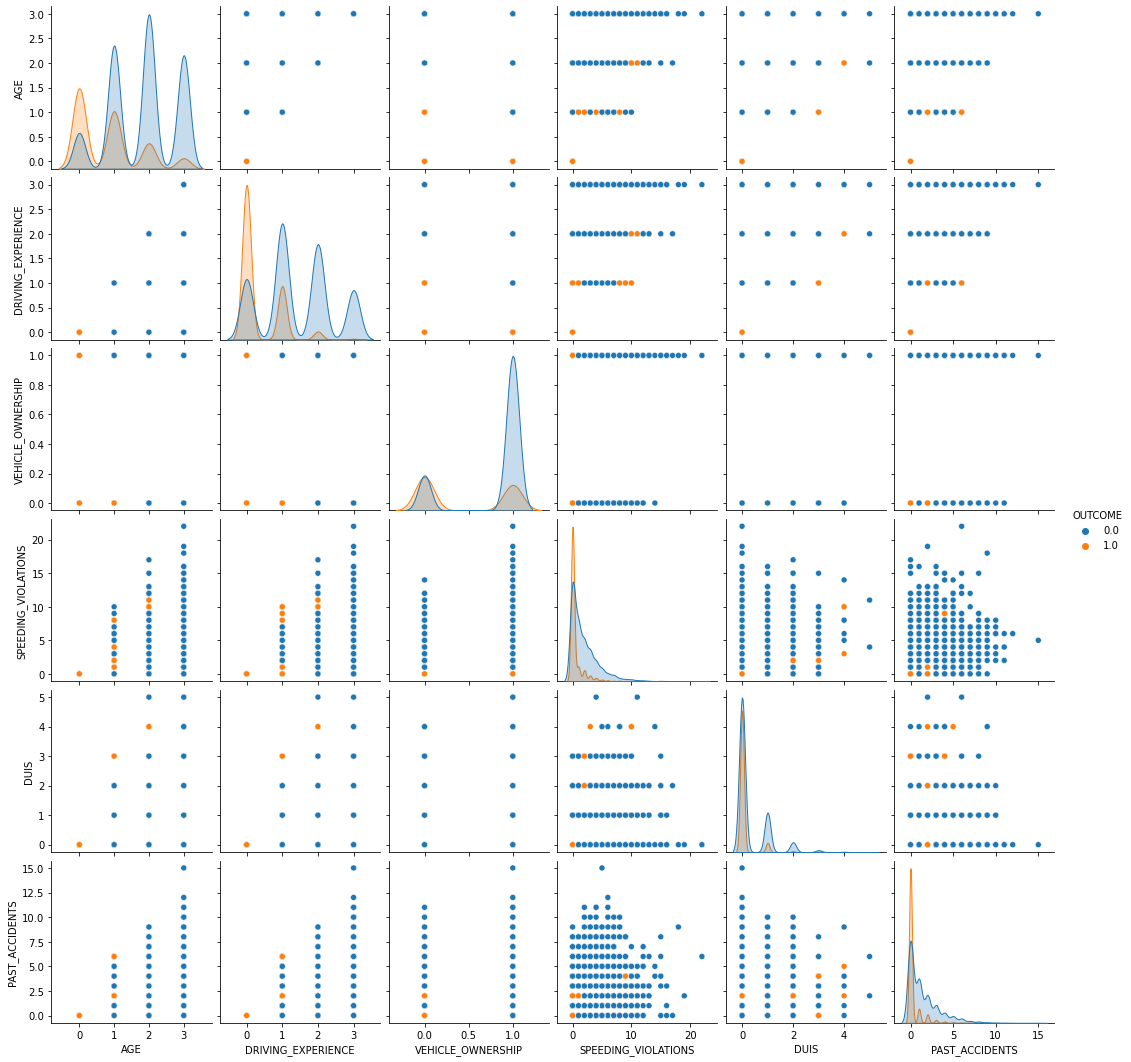

In [10]:
sns.pairplot(pd.concat([X_train, y_train], axis=1), hue='OUTCOME');

In [11]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [12]:
y_train.value_counts()

0.0    4373
1.0    2027
Name: OUTCOME, dtype: int64

In [13]:
y_test.value_counts()

0.0    1367
1.0     633
Name: OUTCOME, dtype: int64

In [14]:
y.value_counts()

0.0    6867
1.0    3133
Name: OUTCOME, dtype: int64

In [15]:
np.mean(y_train)

0.31671875

## Modeling

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
#import lightgbm as ltb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score


In [17]:
def accuracy(actuals, preds):
    return np.mean(actuals == preds)

def precision(actuals, preds):
    tp = np.sum((actuals == 1) & (preds == 1))
    fp = np.sum((actuals == 0) & (preds == 1))
    return tp / (tp + fp)

def recall(actuals, preds):
    tp = np.sum((actuals == 1) & (preds == 1))
    fn = np.sum((actuals == 1) & (preds == 0))
    return tp / (tp + fn)

def F1(actuals, preds):
    p, r = precision(actuals, preds), recall(actuals, preds)
    return 2*p*r / (p + r)

### Logistic Regression

In [18]:
lr_c=LogisticRegression(random_state=42, solver='lbfgs',max_iter=400 )
lr_c.fit(X_train,y_train)
lr_pred=lr_c.predict(X_test)
lr_cm=confusion_matrix(y_test,lr_pred)
lr_ac=accuracy_score(y_test, lr_pred)
print('Accuracy on training set:',lr_c.score(X_train,y_train))
print('Accuracy on validation set:',lr_c.score(X_val,y_val))

Accuracy on training set: 0.800625
Accuracy on validation set: 0.800625


Confusion Matrix for Logistic Regression Classifier 



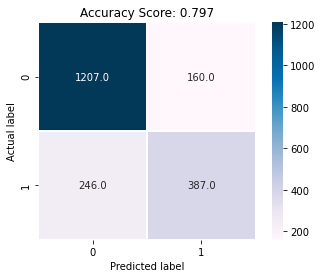

In [19]:
#Confusion matrix for logistic regression model
print("Confusion Matrix for Logistic Regression Classifier","\n")
score = round(accuracy_score(y_test, lr_pred),3) 
cm1 = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score), size = 12)
plt.show()
print("\n")

In [20]:
print('Logistic Regression validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, lr_c.predict(X_test)), 
         precision(y_test, lr_c.predict(X_test)), 
         recall(y_test, lr_c.predict(X_test)),
         F1(y_test, lr_c.predict(X_test))
        )
     )

Logistic Regression validation metrics: 
 Accuracy: 0.7970 
 Precision: 0.7075 
 Recall: 0.6114 
 F1: 0.6559


### Random Forest Classifier

In [21]:
rf_clf = RandomForestClassifier(n_estimators = 10, random_state = 42)
rf_clf.fit(X_train, y_train)
rf_pred=rf_clf.predict(X_test)
rf_ac=accuracy_score(y_test, rf_pred)
print('Accuracy on training set:',rf_clf.score(X_train,y_train))
print('Accuracy on validation set:',rf_clf.score(X_val,y_val))

Accuracy on training set: 0.81703125
Accuracy on validation set: 0.783125


In [22]:
print('Random Forest Classifier: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, rf_clf.predict(X_test)), 
         precision(y_test, rf_clf.predict(X_test)), 
         recall(y_test, rf_clf.predict(X_test)),
         F1(y_test, rf_clf.predict(X_test))
        )
     )

Random Forest Classifier: 
 Accuracy: 0.7920 
 Precision: 0.6776 
 Recall: 0.6540 
 F1: 0.6656


### Decision Tree Classifier

In [23]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
clf_pred = clf.predict(X_test)
clf_ac=accuracy_score(y_test, clf_pred)
print('Accuracy on training set:',clf.score(X_train,y_train))
print('Accuracy on validation set:',clf.score(X_val,y_val))

Accuracy on training set: 0.81765625
Accuracy on validation set: 0.783125


In [24]:
print('Decision Tree: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, clf.predict(X_test)), 
         precision(y_test, clf.predict(X_test)), 
         recall(y_test, clf.predict(X_test)),
         F1(y_test, clf.predict(X_test))
        )
     )

Decision Tree: 
 Accuracy: 0.7920 
 Precision: 0.6848 
 Recall: 0.6351 
 F1: 0.6590


### Support Vector Classifier

In [25]:
svc_r=SVC(kernel='rbf', random_state=0, probability=True)
svc_r.fit(X_train,y_train)
svr_pred=svc_r.predict(X_test)
svr_ac=accuracy_score(y_test, svr_pred)
svr_val=svc_r.score(X_val,y_val)
pred_prob1 = svc_r.predict_proba(X_test)
print('Accuracy of training set: ', svr_ac)
print('Accuracy of training set: ', svr_val)


Accuracy of training set:  0.7955
Accuracy of training set:  0.795


In [26]:
print('Support Vector Classifier: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, svc_r.predict(X_test)), 
         precision(y_test, svc_r.predict(X_test)), 
         recall(y_test, svc_r.predict(X_test)),
         F1(y_test, svc_r.predict(X_test))
        )
     )

Support Vector Classifier: 
 Accuracy: 0.7955 
 Precision: 0.7090 
 Recall: 0.6003 
 F1: 0.6501


### K-nearest nieghbours


In [27]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
knn_val=clf.score(X_val,y_val)
knn_ac=accuracy_score(y_test, knn_pred)
print('Accuracy on training set:',knn.score(X_train,y_train))
print('Accuracy on validation set:',knn.score(X_val,y_val))

Accuracy on training set: 0.78171875
Accuracy on validation set: 0.763125


In [28]:
print('K-nearest nieghbours: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, knn.predict(X_test)), 
         precision(y_test, knn.predict(X_test)), 
         recall(y_test, knn.predict(X_test)),
         F1(y_test, knn.predict(X_test))
        )
     )

K-nearest nieghbours: 
 Accuracy: 0.7600 
 Precision: 0.6759 
 Recall: 0.4645 
 F1: 0.5506


### Ada Boost Classifier

In [29]:
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)
# Train Adaboost Classifer
abc.fit(X_train, y_train)

#Predict the response for test dataset
abc_pred = abc.predict(X_test)
abc_ac=accuracy_score(y_test, abc_pred)
print('Accuracy on training set:',abc.score(X_train,y_train))
print('Accuracy on validation set:',abc.score(X_val,y_val))

Accuracy on training set: 0.8
Accuracy on validation set: 0.796875


In [30]:
print('Ada Boost Classifier: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, abc.predict(X_test)), 
         precision(y_test, abc.predict(X_test)), 
         recall(y_test, abc.predict(X_test)),
         F1(y_test, abc.predict(X_test))
        )
     )

Ada Boost Classifier: 
 Accuracy: 0.7990 
 Precision: 0.7200 
 Recall: 0.5972 
 F1: 0.6528


### Gradient Boosting Classifier

In [31]:
gb_clf = GradientBoostingClassifier(n_estimators=100, max_depth=3,
                               learning_rate=.71)
gb_clf.fit(X_train, y_train)
gb_clf_pred = gb_clf.predict(X_test)
gb_clf_ac=accuracy_score(y_test, gb_clf_pred)
print("Accuracy score (training):" ,gb_clf.score(X_train, y_train))
print("Accuracy score (validation):",(gb_clf.score(X_val, y_val)))

Accuracy score (training): 0.8128125
Accuracy score (validation): 0.788125


In [32]:
print('Gradient Boosting Classifier: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, gb_clf.predict(X_test)), 
         precision(y_test, gb_clf.predict(X_test)), 
         recall(y_test, gb_clf.predict(X_test)),
         F1(y_test, gb_clf.predict(X_test))
        )
     )

Gradient Boosting Classifier: 
 Accuracy: 0.7940 
 Precision: 0.6908 
 Recall: 0.6319 
 F1: 0.6601


### XG Boost Classifier

In [33]:
#!pip install xgboost

In [34]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
xgb_clf_pred = xgb_clf.predict(X_test)
xgb_clf_ac=accuracy_score(y_test, xgb_clf_pred)
print("Accuracy score (training):" ,xgb_clf.score(X_train, y_train))
print("Accuracy score (validation):",(xgb_clf.score(X_val, y_val)))

C:\Users\amira\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:38:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score (training): 0.81328125
Accuracy score (validation): 0.788125


In [35]:
print('XG Boost Classifier: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, xgb_clf.predict(X_test)), 
         precision(y_test, xgb_clf.predict(X_test)), 
         recall(y_test, xgb_clf.predict(X_test)),
         F1(y_test, xgb_clf.predict(X_test))
        )
     )

XG Boost Classifier: 
 Accuracy: 0.7910 
 Precision: 0.6831 
 Recall: 0.6335 
 F1: 0.6574


### Cat Boost Regressor

In [36]:
#!pip install catboost

In [37]:
from catboost import CatBoostClassifier
cbr = CatBoostClassifier()
# Fit model
cbr.fit(X_train, y_train)
# Get predictions
cbr_pred = cbr.predict(X_test)
cbr_ac=accuracy_score(y_test, cbr_pred)


print("Accuracy score (training):" ,cbr.score(X_train, y_train))
print("Accuracy score (validation):",(cbr.score(X_val, y_val)))

Learning rate set to 0.02276
0:	learn: 0.6765566	total: 150ms	remaining: 2m 29s
1:	learn: 0.6606576	total: 154ms	remaining: 1m 16s
2:	learn: 0.6467184	total: 159ms	remaining: 52.7s
3:	learn: 0.6328466	total: 163ms	remaining: 40.5s
4:	learn: 0.6198457	total: 167ms	remaining: 33.3s
5:	learn: 0.6069685	total: 172ms	remaining: 28.6s
6:	learn: 0.5954530	total: 177ms	remaining: 25.1s
7:	learn: 0.5848017	total: 181ms	remaining: 22.5s
8:	learn: 0.5751770	total: 186ms	remaining: 20.4s
9:	learn: 0.5655299	total: 189ms	remaining: 18.7s
10:	learn: 0.5561587	total: 194ms	remaining: 17.4s
11:	learn: 0.5475585	total: 198ms	remaining: 16.3s
12:	learn: 0.5395506	total: 202ms	remaining: 15.3s
13:	learn: 0.5318652	total: 205ms	remaining: 14.5s
14:	learn: 0.5248415	total: 209ms	remaining: 13.7s
15:	learn: 0.5181161	total: 213ms	remaining: 13.1s
16:	learn: 0.5117052	total: 217ms	remaining: 12.6s
17:	learn: 0.5056633	total: 221ms	remaining: 12.1s
18:	learn: 0.5005181	total: 225ms	remaining: 11.6s
19:	learn:

183:	learn: 0.3985444	total: 870ms	remaining: 3.86s
184:	learn: 0.3984936	total: 875ms	remaining: 3.85s
185:	learn: 0.3984627	total: 879ms	remaining: 3.85s
186:	learn: 0.3984629	total: 882ms	remaining: 3.83s
187:	learn: 0.3984121	total: 886ms	remaining: 3.83s
188:	learn: 0.3983698	total: 890ms	remaining: 3.82s
189:	learn: 0.3983368	total: 894ms	remaining: 3.81s
190:	learn: 0.3983211	total: 899ms	remaining: 3.81s
191:	learn: 0.3982738	total: 903ms	remaining: 3.8s
192:	learn: 0.3982705	total: 907ms	remaining: 3.79s
193:	learn: 0.3981117	total: 911ms	remaining: 3.79s
194:	learn: 0.3981071	total: 915ms	remaining: 3.78s
195:	learn: 0.3980059	total: 919ms	remaining: 3.77s
196:	learn: 0.3979630	total: 923ms	remaining: 3.76s
197:	learn: 0.3979169	total: 928ms	remaining: 3.76s
198:	learn: 0.3978341	total: 932ms	remaining: 3.75s
199:	learn: 0.3977654	total: 936ms	remaining: 3.74s
200:	learn: 0.3977356	total: 940ms	remaining: 3.74s
201:	learn: 0.3976177	total: 944ms	remaining: 3.73s
202:	learn: 0

356:	learn: 0.3926850	total: 1.58s	remaining: 2.84s
357:	learn: 0.3926447	total: 1.58s	remaining: 2.84s
358:	learn: 0.3926334	total: 1.59s	remaining: 2.83s
359:	learn: 0.3926030	total: 1.59s	remaining: 2.83s
360:	learn: 0.3925500	total: 1.59s	remaining: 2.82s
361:	learn: 0.3925407	total: 1.6s	remaining: 2.81s
362:	learn: 0.3925321	total: 1.6s	remaining: 2.81s
363:	learn: 0.3924788	total: 1.61s	remaining: 2.81s
364:	learn: 0.3924323	total: 1.61s	remaining: 2.8s
365:	learn: 0.3924303	total: 1.61s	remaining: 2.79s
366:	learn: 0.3923991	total: 1.62s	remaining: 2.79s
367:	learn: 0.3923972	total: 1.62s	remaining: 2.78s
368:	learn: 0.3923367	total: 1.63s	remaining: 2.78s
369:	learn: 0.3922535	total: 1.63s	remaining: 2.78s
370:	learn: 0.3921883	total: 1.63s	remaining: 2.77s
371:	learn: 0.3921864	total: 1.64s	remaining: 2.77s
372:	learn: 0.3921269	total: 1.64s	remaining: 2.76s
373:	learn: 0.3920976	total: 1.65s	remaining: 2.76s
374:	learn: 0.3920496	total: 1.65s	remaining: 2.75s
375:	learn: 0.3

520:	learn: 0.3870662	total: 2.28s	remaining: 2.1s
521:	learn: 0.3870337	total: 2.28s	remaining: 2.09s
522:	learn: 0.3869809	total: 2.29s	remaining: 2.09s
523:	learn: 0.3869641	total: 2.29s	remaining: 2.08s
524:	learn: 0.3869185	total: 2.3s	remaining: 2.08s
525:	learn: 0.3868962	total: 2.3s	remaining: 2.07s
526:	learn: 0.3868803	total: 2.3s	remaining: 2.07s
527:	learn: 0.3868578	total: 2.31s	remaining: 2.06s
528:	learn: 0.3868409	total: 2.31s	remaining: 2.06s
529:	learn: 0.3868254	total: 2.32s	remaining: 2.06s
530:	learn: 0.3868128	total: 2.32s	remaining: 2.05s
531:	learn: 0.3867973	total: 2.33s	remaining: 2.05s
532:	learn: 0.3867873	total: 2.33s	remaining: 2.04s
533:	learn: 0.3867808	total: 2.33s	remaining: 2.04s
534:	learn: 0.3867229	total: 2.34s	remaining: 2.03s
535:	learn: 0.3867170	total: 2.34s	remaining: 2.03s
536:	learn: 0.3866584	total: 2.35s	remaining: 2.02s
537:	learn: 0.3866090	total: 2.35s	remaining: 2.02s
538:	learn: 0.3865661	total: 2.35s	remaining: 2.01s
539:	learn: 0.38

688:	learn: 0.3830642	total: 3.01s	remaining: 1.36s
689:	learn: 0.3830306	total: 3.01s	remaining: 1.35s
690:	learn: 0.3830206	total: 3.02s	remaining: 1.35s
691:	learn: 0.3830138	total: 3.02s	remaining: 1.34s
692:	learn: 0.3829964	total: 3.02s	remaining: 1.34s
693:	learn: 0.3829542	total: 3.03s	remaining: 1.33s
694:	learn: 0.3829416	total: 3.03s	remaining: 1.33s
695:	learn: 0.3829203	total: 3.04s	remaining: 1.32s
696:	learn: 0.3829127	total: 3.04s	remaining: 1.32s
697:	learn: 0.3829090	total: 3.04s	remaining: 1.32s
698:	learn: 0.3828637	total: 3.05s	remaining: 1.31s
699:	learn: 0.3828395	total: 3.05s	remaining: 1.31s
700:	learn: 0.3828391	total: 3.06s	remaining: 1.3s
701:	learn: 0.3828194	total: 3.06s	remaining: 1.3s
702:	learn: 0.3828026	total: 3.06s	remaining: 1.29s
703:	learn: 0.3827824	total: 3.07s	remaining: 1.29s
704:	learn: 0.3827530	total: 3.07s	remaining: 1.29s
705:	learn: 0.3827287	total: 3.08s	remaining: 1.28s
706:	learn: 0.3826925	total: 3.08s	remaining: 1.28s
707:	learn: 0.

858:	learn: 0.3798881	total: 3.74s	remaining: 613ms
859:	learn: 0.3798658	total: 3.74s	remaining: 609ms
860:	learn: 0.3798244	total: 3.74s	remaining: 605ms
861:	learn: 0.3798037	total: 3.75s	remaining: 600ms
862:	learn: 0.3797961	total: 3.75s	remaining: 596ms
863:	learn: 0.3797871	total: 3.76s	remaining: 591ms
864:	learn: 0.3797723	total: 3.76s	remaining: 587ms
865:	learn: 0.3797289	total: 3.76s	remaining: 583ms
866:	learn: 0.3797055	total: 3.77s	remaining: 578ms
867:	learn: 0.3796630	total: 3.77s	remaining: 574ms
868:	learn: 0.3796323	total: 3.78s	remaining: 569ms
869:	learn: 0.3796285	total: 3.78s	remaining: 565ms
870:	learn: 0.3796195	total: 3.79s	remaining: 561ms
871:	learn: 0.3796124	total: 3.79s	remaining: 556ms
872:	learn: 0.3795810	total: 3.79s	remaining: 552ms
873:	learn: 0.3795630	total: 3.8s	remaining: 548ms
874:	learn: 0.3794991	total: 3.8s	remaining: 543ms
875:	learn: 0.3794697	total: 3.81s	remaining: 539ms
876:	learn: 0.3794673	total: 3.81s	remaining: 534ms
877:	learn: 0.

In [38]:
print('Cat Boost Classifier: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, cbr.predict(X_test)), 
         precision(y_test, cbr.predict(X_test)), 
         recall(y_test, cbr.predict(X_test)),
         F1(y_test, cbr.predict(X_test))
        )
     )

Cat Boost Classifier: 
 Accuracy: 0.7950 
 Precision: 0.6939 
 Recall: 0.6303 
 F1: 0.6606


## Voting Classifier

In [39]:
model_names = ["lr_c", "rf_clf", 'clf',"svc_r", "knn","abc","gb_clf","xgb_clf","cbr"]
model_var = [eval(n) for n in model_names]
model_list = list(zip(model_names, model_var))
model_list

[('lr_c', LogisticRegression(max_iter=400, random_state=42)),
 ('rf_clf', RandomForestClassifier(n_estimators=10, random_state=42)),
 ('clf', DecisionTreeClassifier()),
 ('svc_r', SVC(probability=True, random_state=0)),
 ('knn', KNeighborsClassifier()),
 ('abc', AdaBoostClassifier(learning_rate=1)),
 ('gb_clf', GradientBoostingClassifier(learning_rate=0.71)),
 ('xgb_clf',
  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
                gamma=0, gpu_id=-1, importance_type=None,
                interaction_constraints='', learning_rate=0.300000012,
                max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=8,
                num_parallel_tree=1, predictor='auto', random_state=0,
                reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
                tree_method='exact', validate

In [40]:
for model_name in model_names:
    curr_model = eval(model_name)
    print(f'{model_name} score: {curr_model.score(X_test, y_test)}')

lr_c score: 0.797
rf_clf score: 0.792
clf score: 0.792
svc_r score: 0.7955
knn score: 0.76
abc score: 0.799
gb_clf score: 0.794
xgb_clf score: 0.791
cbr score: 0.795


In [41]:
from sklearn.ensemble import VotingClassifier
voting_classifer = VotingClassifier(estimators=model_list,
                                    voting='hard', #<-- sklearn calls this hard voting
                                    n_jobs=-1)
voting_classifer.fit(X_train, y_train)

VotingClassifier(estimators=[('lr_c',
                              LogisticRegression(max_iter=400,
                                                 random_state=42)),
                             ('rf_clf',
                              RandomForestClassifier(n_estimators=10,
                                                     random_state=42)),
                             ('clf', DecisionTreeClassifier()),
                             ('svc_r', SVC(probability=True, random_state=0)),
                             ('knn', KNeighborsClassifier()),
                             ('abc', AdaBoostClassifier(learning_rate=1)),
                             ('gb_clf',
                              GradientBoostingClassifier(lear...
                                            max_delta_step=0, max_depth=6,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='()',
                                         

In [42]:
y_pred1 = voting_classifer.predict(X_test)
accuracy_score(y_test, y_pred1)

0.7975

Text(0.5, 1.0, 'Model Accuracy')

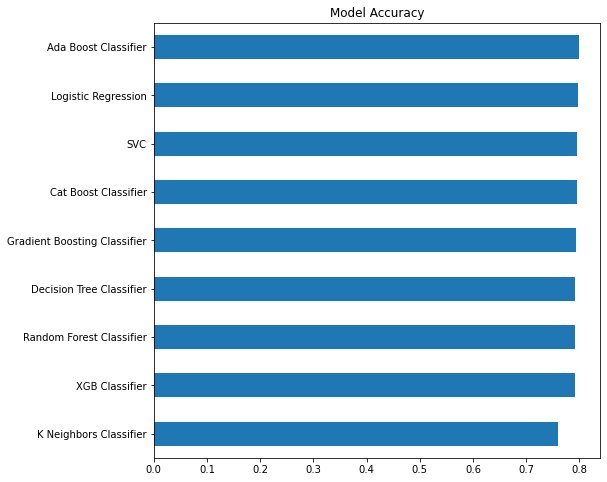

In [43]:
#Plot of accuracy of all models
%matplotlib inline
model_accuracy = pd.Series(data=[lr_ac,rf_ac, clf_ac,svr_ac, knn_ac,abc_ac,gb_clf_ac,xgb_clf_ac,cbr_ac], 
        index=['Logistic Regression','Random Forest Classifier','Decision Tree Classifier','SVC','K Neighbors Classifier','Ada Boost Classifier','Gradient Boosting Classifier','XGB Classifier','Cat Boost Classifier'])
fig= plt.figure(figsize=(8,8))
model_accuracy.sort_values().plot.barh()
plt.title('Model Accuracy')

## Plot the ROC Curve

Next, we’ll calculate the true positive rate and the false positive rate and create a ROC curve for for all the models by using the Matplotlib data visualization package

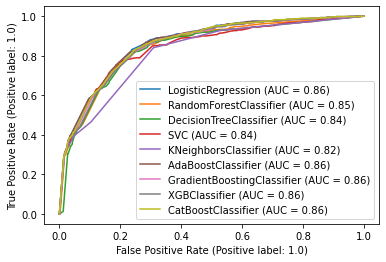

In [44]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import RocCurveDisplay

#create ROC curve for all the models (stands for: “receiver operating characteristic” curve)

disp =  RocCurveDisplay.from_estimator(lr_c, X_test, y_test)

RocCurveDisplay.from_estimator(rf_clf, X_test, y_test, ax=disp.ax_);
RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=disp.ax_);
RocCurveDisplay.from_estimator(svc_r, X_test, y_test, ax=disp.ax_);
RocCurveDisplay.from_estimator(knn, X_test, y_test, ax=disp.ax_);
RocCurveDisplay.from_estimator(abc, X_test, y_test, ax=disp.ax_);
RocCurveDisplay.from_estimator(gb_clf, X_test, y_test, ax=disp.ax_);
RocCurveDisplay.from_estimator(xgb_clf, X_test, y_test, ax=disp.ax_);
RocCurveDisplay.from_estimator(cbr, X_test, y_test, ax=disp.ax_);

### we see that  Random forest is the best model.
